In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import path

train_path = path.join("res", "train.csv")
test_path = path.join("res", "test.csv")

## Cargamos los datos de entrenamiento

In [92]:
train_data = pd.read_csv(train_path)
train_data 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [93]:
train_data.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Cargamos los dataset de test

In [94]:
test_data = pd.read_csv(test_path)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [95]:
print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


In [96]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot: xlabel='Embarked', ylabel='Survived'>

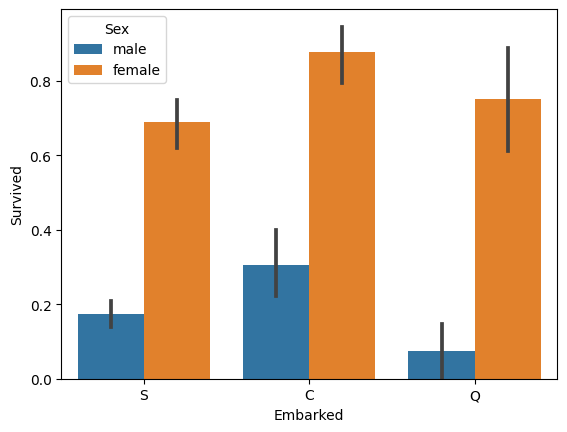

In [97]:
sns.barplot(x = "Embarked", y = "Survived", hue= "Sex", data = train_data)

<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

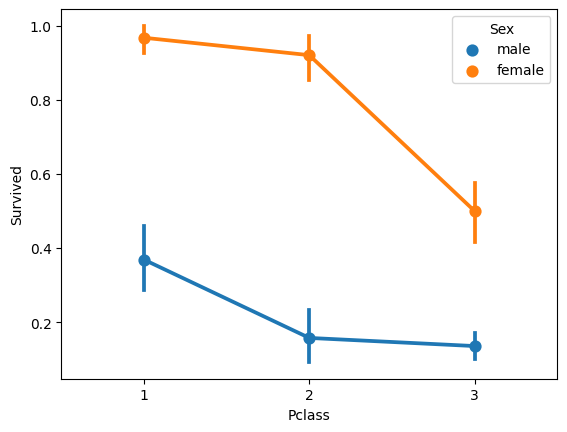

In [98]:
sns.pointplot(x = "Pclass", y = "Survived", hue = "Sex", data = train_data)

In [99]:
edades = list(train_data.Age.unique())
edades.sort()
print(edades)
print()
print(len(edades))

[0.83, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 11.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 28.5, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 38.0, nan, 0.42, 0.67, 0.75, 0.92, 1.0, 6.0, 9.0, 10.0, 12.0, 13.0, 14.5, 20.5, 23.5, 24.5, 30.5, 32.5, 34.5, 36.0, 36.5, 37.0, 39.0, 40.0, 40.5, 41.0, 42.0, 43.0, 44.0, 45.0, 45.5, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 55.5, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 70.0, 70.5, 71.0, 74.0, 80.0]

89


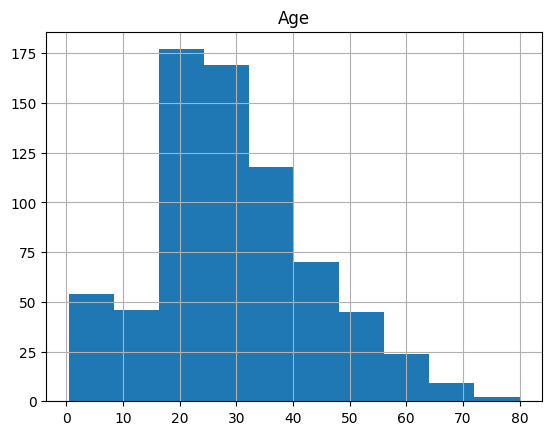

In [100]:
train_data.hist(column = "Age")
plt.show()

In [101]:
def cat_age(data):
    """
    Funcion que imputa el valor -0.5 a los NaN.
    Bines: -1, 0, 12, 18, 30, 60, 120
    Input: pandas dataframe
    Output: pandas dataframe
    """
    
    data["Age"] = data["Age"].fillna(-0.5)
    bins = (-1, 0, 12, 18, 30, 60, 120)
    cat_names = ["Unknown", "Child", "Teenagers", "Young Adult", "Adult", "Elderly"]
    categories = pd.cut(data["Age"], bins, labels = cat_names)
    data["Age"] = categories
    return

In [102]:
cat_age?

Signature: cat_age(data)
Docstring:
Funcion que imputa el valor -0.5 a los NaN.
Bines: -1, 0, 12, 18, 30, 60, 120
Input: pandas dataframe
Output: pandas dataframe
File:      c:\users\uri33\appdata\local\temp\ipykernel_27864\1530793104.py
Type:      function


In [103]:
cat_age(train_data)

In [104]:
cat_age(test_data)

In [105]:
train_data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,Young Adult,1,0,2926,26.0000,NaN,S
608,609,1,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",female,Young Adult,1,2,SC/Paris 2123,41.5792,NaN,C
387,388,1,2,"Buss, Miss. Kate",female,Adult,0,0,27849,13.0000,NaN,S
60,61,0,3,"Sirayanian, Mr. Orsen",male,Young Adult,0,0,2669,7.2292,NaN,C
358,359,1,3,"McGovern, Miss. Mary",female,Unknown,0,0,330931,7.8792,NaN,Q
79,80,1,3,"Dowdell, Miss. Elizabeth",female,Young Adult,0,0,364516,12.4750,NaN,S
698,699,0,1,"Thayer, Mr. John Borland",male,Adult,1,1,17421,110.8833,C68,C
869,870,1,3,"Johnson, Master. Harold Theodor",male,Child,1,1,347742,11.1333,NaN,S
468,469,0,3,"Scanlan, Mr. James",male,Unknown,0,0,36209,7.7250,NaN,Q
272,273,1,2,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,Adult,0,1,250644,19.5000,NaN,S


## Camarotes

<AxesSubplot: xlabel='Cabin', ylabel='count'>

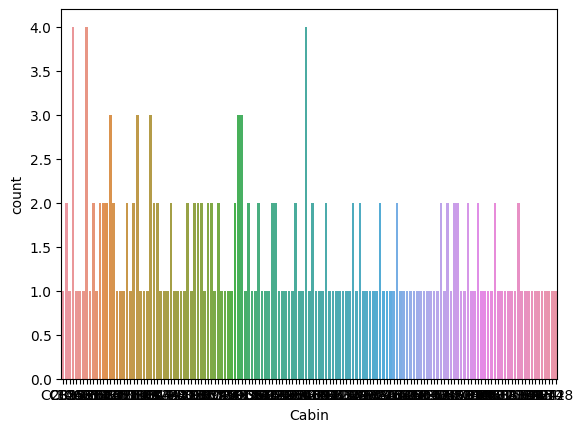

In [106]:
sns.countplot(x = "Cabin", data = train_data)

In [107]:
def extract_cabin(data):
    """
    Funcion para tratar los camarotes.
    Gestión de NAs: asignamos la letra N cuando no tengan camarote asignado.
    Para el resto de camarotes, nos quedamos con la primera letra del identificador del camarote.
    Input: pandas dataframe,
    Output: pandas dataframe.
    """
    
    data["Cabin"] = data ["Cabin"].fillna("N")
    data["Cabin"] = data["Cabin"]. apply(lambda x: x[0])
    return

In [108]:
extract_cabin(train_data)
extract_cabin(test_data)

In [109]:
train_data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
571,572,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,Adult,2,0,11769,51.4792,C,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,Teenagers,0,0,330923,8.0292,N,Q
331,332,0,1,"Partner, Mr. Austen",male,Adult,0,0,113043,28.5000,C,S
267,268,1,3,"Persson, Mr. Ernst Ulrik",male,Young Adult,1,0,347083,7.7750,N,S
20,21,0,2,"Fynney, Mr. Joseph J",male,Adult,0,0,239865,26.0000,N,S
704,705,0,3,"Hansen, Mr. Henrik Juul",male,Young Adult,1,0,350025,7.8542,N,S
403,404,0,3,"Hakkarainen, Mr. Pekka Pietari",male,Young Adult,1,0,STON/O2. 3101279,15.8500,N,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,Child,4,2,347082,31.2750,N,S
661,662,0,3,"Badt, Mr. Mohamed",male,Adult,0,0,2623,7.2250,N,C
414,415,1,3,"Sundman, Mr. Johan Julian",male,Adult,0,0,STON/O 2. 3101269,7.9250,N,S


## Precios

In [110]:
def cat_fare(data):
    """
    Funcion para imputar los valores faltantes de las tarifas y categorizarlos.
    Input: pandas dataframe.
    Output: pandas dataframe.
    """
    
    data["Fare"] = data["Fare"].fillna(0.0)
    cat_names = ["1st", "2nd", "3rd", "4th", "5th"]
    data["Fare"] = pd.qcut(data["Fare"], 5, labels = cat_names)
    return

In [111]:
cat_fare(train_data)
cat_fare(test_data)

In [112]:
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
330,331,1,3,"McCoy, Miss. Agnes",female,Unknown,2,0,367226,4th,N,Q
138,139,0,3,"Osen, Mr. Olaf Elon",male,Teenagers,0,0,7534,2nd,N,S
388,389,0,3,"Sadlier, Mr. Matthew",male,Unknown,0,0,367655,1st,N,Q
397,398,0,2,"McKane, Mr. Peter David",male,Adult,0,0,28403,4th,N,S
248,249,1,1,"Beckwith, Mr. Richard Leonard",male,Adult,1,1,11751,5th,D,S


## Nombres

In [113]:
train_data["Name"].sample(15)

492                           Molson, Mr. Harry Markland
651                                  Doling, Miss. Elsie
191                                Carbines, Mr. William
307    Penasco y Castellana, Mrs. Victor de Satode (M...
881                                   Markun, Mr. Johann
739                                   Nankoff, Mr. Minko
330                                   McCoy, Miss. Agnes
677                              Turja, Miss. Anna Sofia
251           Strom, Mrs. Wilhelm (Elna Matilda Persson)
745                         Crosby, Capt. Edward Gifford
589                                  Murdlin, Mr. Joseph
463                         Milling, Mr. Jacob Christian
601                                 Slabenoff, Mr. Petco
704                              Hansen, Mr. Henrik Juul
557                                  Robbins, Mr. Victor
Name: Name, dtype: object

In [114]:
def extract_title(data):
    """
    Funcion para extraer el titulo de las personas.
    Input: pandas dataframe.
    Output: pandas dataframe.
    """
    
    data["Title"] = data["Name"].apply(lambda x: x.split()[1])
    return


In [115]:
extract_title(train_data)
extract_title(test_data)

In [116]:
train_data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
694,695,0,1,"Weir, Col. John",male,Adult,0,0,113800,4th,N,S,Col.
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,Unknown,1,0,386525,3rd,N,S,Mrs.
711,712,0,1,"Klaber, Mr. Herman",male,Unknown,0,0,113028,4th,C,S,Mr.
521,522,0,3,"Vovk, Mr. Janko",male,Young Adult,0,0,349252,2nd,N,S,Mr.
298,299,1,1,"Saalfeld, Mr. Adolphe",male,Unknown,0,0,19988,4th,C,S,Mr.
471,472,0,3,"Cacic, Mr. Luka",male,Adult,0,0,315089,2nd,N,S,Mr.
287,288,0,3,"Naidenoff, Mr. Penko",male,Young Adult,0,0,349206,2nd,N,S,Mr.
235,236,0,3,"Harknett, Miss. Alice Phoebe",female,Unknown,0,0,W./C. 6609,1st,N,S,Miss.
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,Young Adult,0,0,PC 17477,5th,B,C,Mme.
818,819,0,3,"Holm, Mr. John Fredrik Alexander",male,Adult,0,0,C 7075,1st,N,S,Mr.


## Eliminamos lo que no nos sirve para el analisis

In [117]:
columns_to_drop = ["Name", "Ticket", "Embarked"]

In [118]:
def drop_columns(data, columns):
    """
    Funcion que elimina las columnas indicadas en una lista.
    Input: 
        - data: pandas dataframe.
        - columns: list.
    Output: pandas dataframe.
    """
    
    data.drop(columns, axis = 1, inplace = True)
    return

In [119]:
drop_columns(train_data, columns_to_drop)
drop_columns(test_data, columns_to_drop)

In [120]:
train_data.sample(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title
626,627,0,2,male,Adult,0,0,3rd,N,Rev.
69,70,0,3,male,Young Adult,2,0,2nd,N,Mr.
77,78,0,3,male,Unknown,0,0,2nd,N,Mr.
366,367,1,1,female,Adult,1,0,5th,D,Mrs.
884,885,0,3,male,Young Adult,0,0,1st,N,Mr.
497,498,0,3,male,Unknown,0,0,3rd,N,Mr.
173,174,0,3,male,Young Adult,0,0,2nd,N,Mr.
824,825,0,3,male,Child,4,1,4th,N,Master.
613,614,0,3,male,Unknown,0,0,1st,N,Mr.
495,496,0,3,male,Unknown,0,0,3rd,N,Mr.


<AxesSubplot: xlabel='Age', ylabel='Survived'>

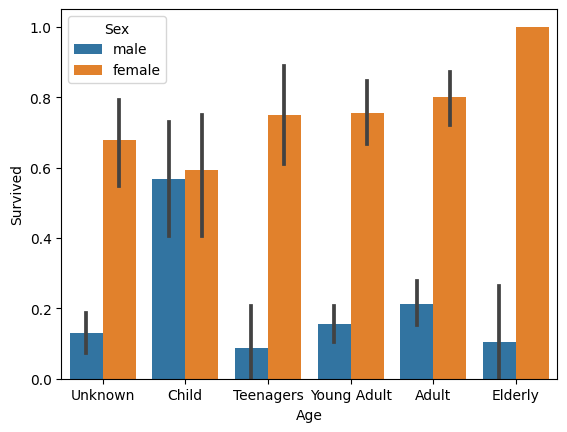

In [121]:
sns.barplot(x = "Age", y = "Survived", hue = "Sex", data = train_data)

<AxesSubplot: xlabel='Fare', ylabel='Survived'>

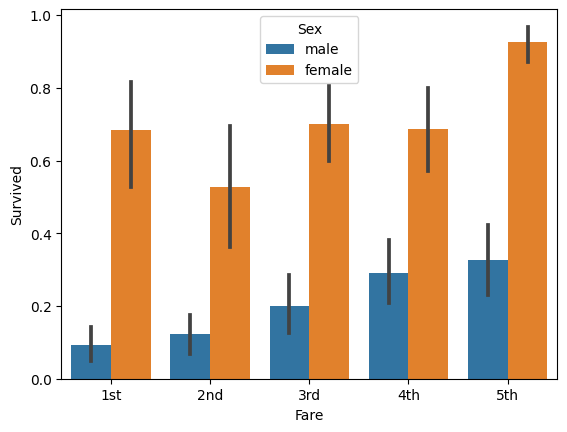

In [122]:
sns.barplot(x = "Fare", y = "Survived", hue = "Sex", data = train_data)

## Modelado Machine Learning

### Debemos codificar las variables categóricas en forma de números

In [123]:
from sklearn import preprocessing

In [124]:
df_train = train_data.copy()
df_test = test_data.copy()

In [125]:
def encode_features(df_train, df_test, features):
    """
    
    """
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
        print(f"Feature {feature} OK")

In [128]:
features = ["Sex", "Age", "Fare", "Cabin", "Title"]
encode_features(df_train, df_test, features)
df_train.sample(5)

Feature Sex OK
Feature Age OK
Feature Fare OK
Feature Cabin OK
Feature Title OK


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title
541,542,0,3,0,1,4,2,3,7,16
367,368,1,3,0,4,0,0,0,7,20
675,676,0,3,1,3,0,0,0,7,19
178,179,0,2,1,5,0,0,2,7,19
90,91,0,3,1,5,0,0,1,7,19


In [129]:
df_test.sample(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title
154,1046,3,1,3,4,2,3,7,13
208,1100,1,0,0,0,0,3,0,16
322,1214,2,1,5,0,0,2,5,19
69,961,1,0,0,1,4,4,2,20
281,1173,3,1,1,1,1,2,7,13


## Separamos datos con Train Test Split

In [130]:
from sklearn.model_selection import train_test_split

In [134]:
y = df_train["Survived"]
X = df_train.drop(["Survived", "PassengerId"], axis = 1)

validation_split = 0.15
seed = 42
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = validation_split, random_state = seed)

## Creamos el modelo

In [136]:
from sklearn.tree import DecisionTreeClassifier

In [137]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [138]:
from sklearn.metrics import accuracy_score

In [139]:
preds = model.predict(X_validation)

In [140]:
accuracy_score(preds, y_validation)

0.7985074626865671

In [141]:
from sklearn.metrics import confusion_matrix

In [142]:
print(confusion_matrix(y_validation, preds))

[[66 12]
 [15 41]]


In [143]:
from sklearn.metrics import classification_report

In [144]:
print(classification_report(y_validation, preds))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        78
           1       0.77      0.73      0.75        56

    accuracy                           0.80       134
   macro avg       0.79      0.79      0.79       134
weighted avg       0.80      0.80      0.80       134

